Dataset shows traffic to and from Airport as a Percentage of Traffic value during baseline period.

Each row represents the airport traffic for that day at that airport

PercentofBaseline is defined as:
 - proportion of trips on corresponding date compared to Avg Number of trips on the same day of the week in baseline period

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium.plugins import MarkerCluster    # for world map

from datetime import date

In [2]:
df = pd.read_csv('covid_impact_on_airport_traffic.csv')

# Inspect Data

In [3]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [5]:
df['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [6]:
# fix United States of America
df['Country'] = df['Country'].str.replace(
    'United States of America (the)', 
    'USA',
    regex = False
).astype(object)

### Make date column into datetime

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
print(f'Start Date: {df.Date.min()}')
print(f'End Date:   {df.Date.max()}')

Start Date: 2020-03-16 00:00:00
End Date:   2020-12-02 00:00:00


### Create Weekday Column

In [9]:
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

### Create Month Column

In [10]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

### Get Longitude and Latitude Values

In [11]:
df['longitude'] = df['Centroid'] \
.apply(lambda x: x[6: -1].split(' ')[0])

df['latitude'] = df['Centroid'] \
.apply(lambda x: x[6: -1].split(' ')[1])

### Number of instances per airport per country

In [12]:
df_airports_per_country = df.groupby('Country')['AirportName'] \
.value_counts() \
.to_frame() \
.rename(columns = {'AirportName': 'Num_of_Instances'}) \
.reset_index()

df_airports_per_country

,Country,AirportName,Num_of_Instances
0,Australia,Kingsford Smith,257
1,Canada,Montreal Trudeau,262
2,Canada,Calgary International,261
3,Canada,Toronto Pearson,261
4,Canada,Vancouver International,261
5,Canada,Winnipeg International,261
6,Canada,Hamilton International,260
7,Canada,Montreal Mirabel,257
8,Canada,Halifax International,252
9,Canada,Edmonton International,236


### Drop Unwanted Columns

In [13]:
# drop unwanted columns
df.drop(
    columns = ['Centroid', 'AggregationMethod', 'Version'], 
    inplace = True
)

In [14]:
# inspect df after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7247 non-null   datetime64[ns]
 1   AirportName        7247 non-null   object        
 2   PercentOfBaseline  7247 non-null   int64         
 3   City               7247 non-null   object        
 4   State              7247 non-null   object        
 5   ISO_3166_2         7247 non-null   object        
 6   Country            7247 non-null   object        
 7   Geography          7247 non-null   object        
 8   Weekday            7247 non-null   object        
 9   Month              7247 non-null   object        
 10  longitude          7247 non-null   object        
 11  latitude           7247 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 679.5+ KB


### Create avg Daily %baseline per airport

In [15]:
df_daily_baseline_stats = \
df.groupby('AirportName')['PercentOfBaseline'] \
.describe() \
.reset_index()

df_daily_baseline_stats.rename(
    columns = {'mean' : 'Avg PercentOfBaseline'},
    inplace = True
)

df_daily_baseline_stats.head()

,AirportName,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max
0,Boston Logan International,261.0,64.704981,8.730645,32.0,60.00,64.0,68.00,97.0
1,Calgary International,261.0,89.513410,14.520172,19.0,87.00,93.0,100.00,100.0
2,Charlotte Douglas International,261.0,75.375479,16.645305,16.0,66.00,77.0,87.00,100.0
3,Chicago OHare International,261.0,73.084291,10.516314,21.0,69.00,75.0,80.00,95.0
4,Dallas/Fort Worth International,262.0,75.293893,18.189548,0.0,65.25,78.0,89.75,100.0


### Create avg Monthly %baseline per airport 

In [16]:
df_monthly_baseline_stats = df.groupby(['AirportName', 'Month'])['PercentOfBaseline'] \
.describe() \
.reset_index()

df_monthly_baseline_stats.rename(
    columns = {'mean' : 'Avg PercentOfBaseline'},
    inplace = True
)

df_monthly_baseline_stats.head()

,AirportName,Month,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max
0,Boston Logan International,April,30.0,59.900000,4.412756,48.0,56.25,60.0,63.00,66.0
1,Boston Logan International,August,30.0,65.933333,4.961461,57.0,62.00,65.5,68.00,76.0
2,Boston Logan International,December,2.0,69.000000,4.242641,66.0,67.50,69.0,70.50,72.0
3,Boston Logan International,July,31.0,65.354839,7.176575,51.0,62.00,64.0,68.50,91.0
4,Boston Logan International,June,30.0,61.766667,5.110391,52.0,58.25,62.0,64.75,73.0


### Create avg weekday %baseline per airport
 - there is a unique weekday for each airport (no repeat of weekday for one airport)

In [17]:
df_weekday_baseline_stats = df.groupby(['AirportName', 'Weekday'])['PercentOfBaseline'] \
.describe() \
.reset_index()

df_weekday_baseline_stats.rename(
    columns = {'mean' : 'Avg PercentOfBaseline'},
    inplace = True
)

df_weekday_baseline_stats.head()

,AirportName,Weekday,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max
0,Boston Logan International,Friday,37.0,63.567568,7.672246,46.0,59.0,63.0,68.0,89.0
1,Boston Logan International,Monday,37.0,64.162162,10.510612,32.0,60.0,65.0,69.0,97.0
2,Boston Logan International,Saturday,37.0,62.432432,7.213184,51.0,58.0,63.0,66.0,90.0
3,Boston Logan International,Sunday,37.0,63.351351,8.192870,47.0,58.0,63.0,68.0,89.0
4,Boston Logan International,Thursday,37.0,61.432432,7.861794,38.0,58.0,61.0,64.0,87.0


### Visualize Final Dataset

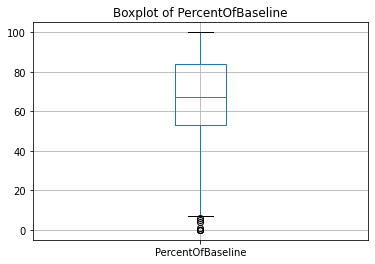

In [18]:
df.boxplot()
plt.title('Boxplot of PercentOfBaseline')
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'PercentOfBaseline'}>]], dtype=object)

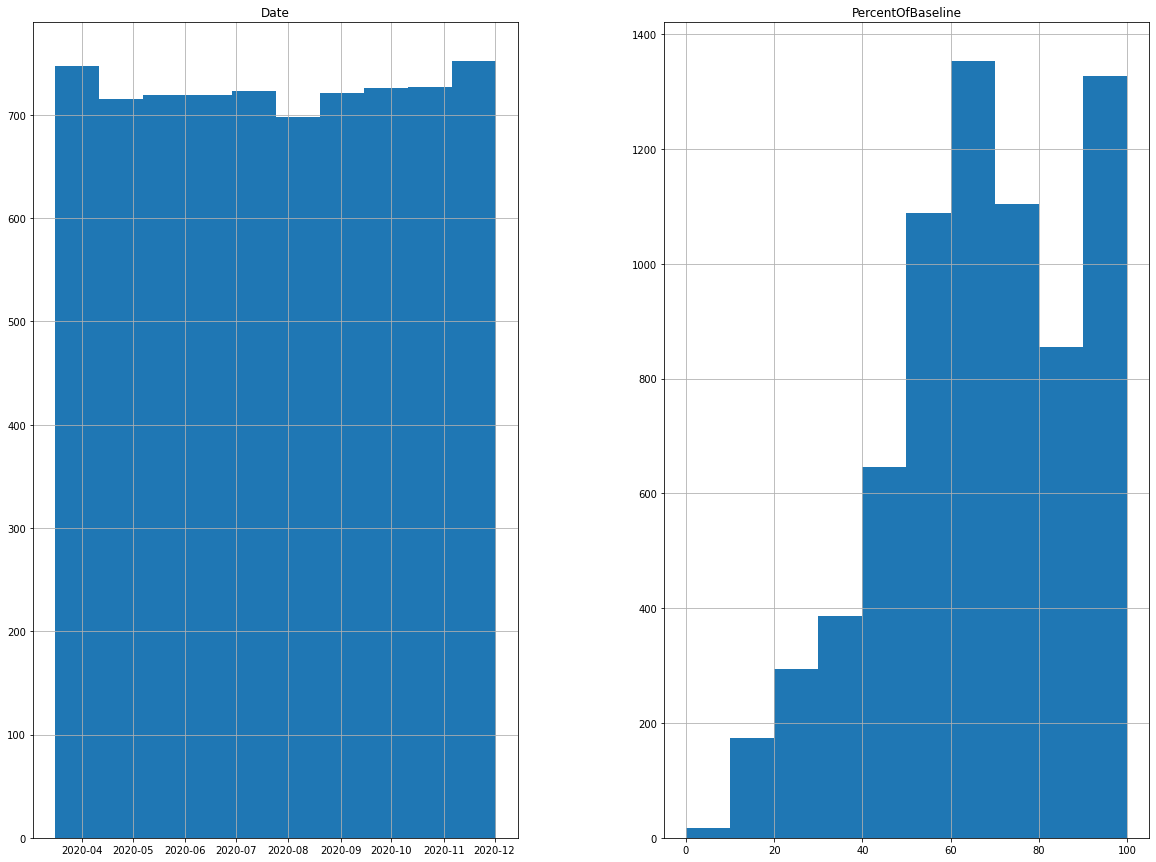

In [19]:
df.hist(figsize = (20,15))

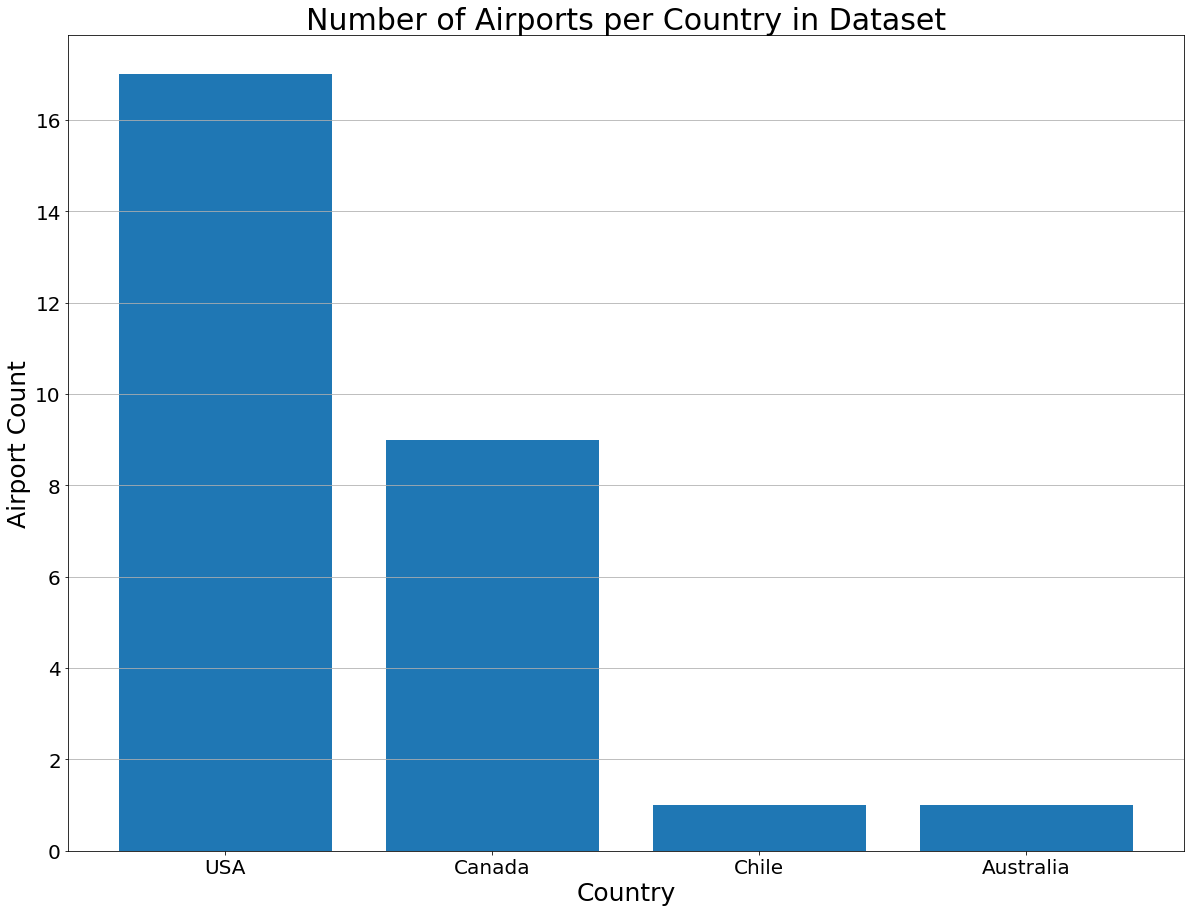

In [20]:
country = df_airports_per_country['Country'].value_counts().index.to_list()
airport_count = df_airports_per_country['Country'].value_counts().values

fig = plt.figure(figsize = (20, 15))
plt.bar(country, airport_count)
plt.xlabel('Country', size = 25)
plt.ylabel('Airport Count', size = 25)
plt.title('Number of Airports per Country in Dataset', size = 30)
plt.tick_params(labelsize = 20)
plt.grid(axis = 'y')
plt.show()

### Total Airport Traffic per Month

In [21]:
df_month_counts = df['Month'] \
.value_counts() \
.to_frame(name = 'Count') \
.reset_index() \
.rename(columns = {'index': 'Month'})

In [22]:
from calendar import month_name

# a function that sorts unordered months into the typical calendar month order
def sort_by_month (df):
    # a list of months following calendar month order
    month_lookup = list(month_name)

    df['Month'] = pd.Categorical(
        df['Month'], 
        categories = month_lookup, 
        ordered = True
    )
    
    df.sort_values(by = 'Month', inplace = True)
    df.reset_index(drop = 'index', inplace = True)

    return df

In [23]:
df_month_counts = sort_by_month(df_month_counts)

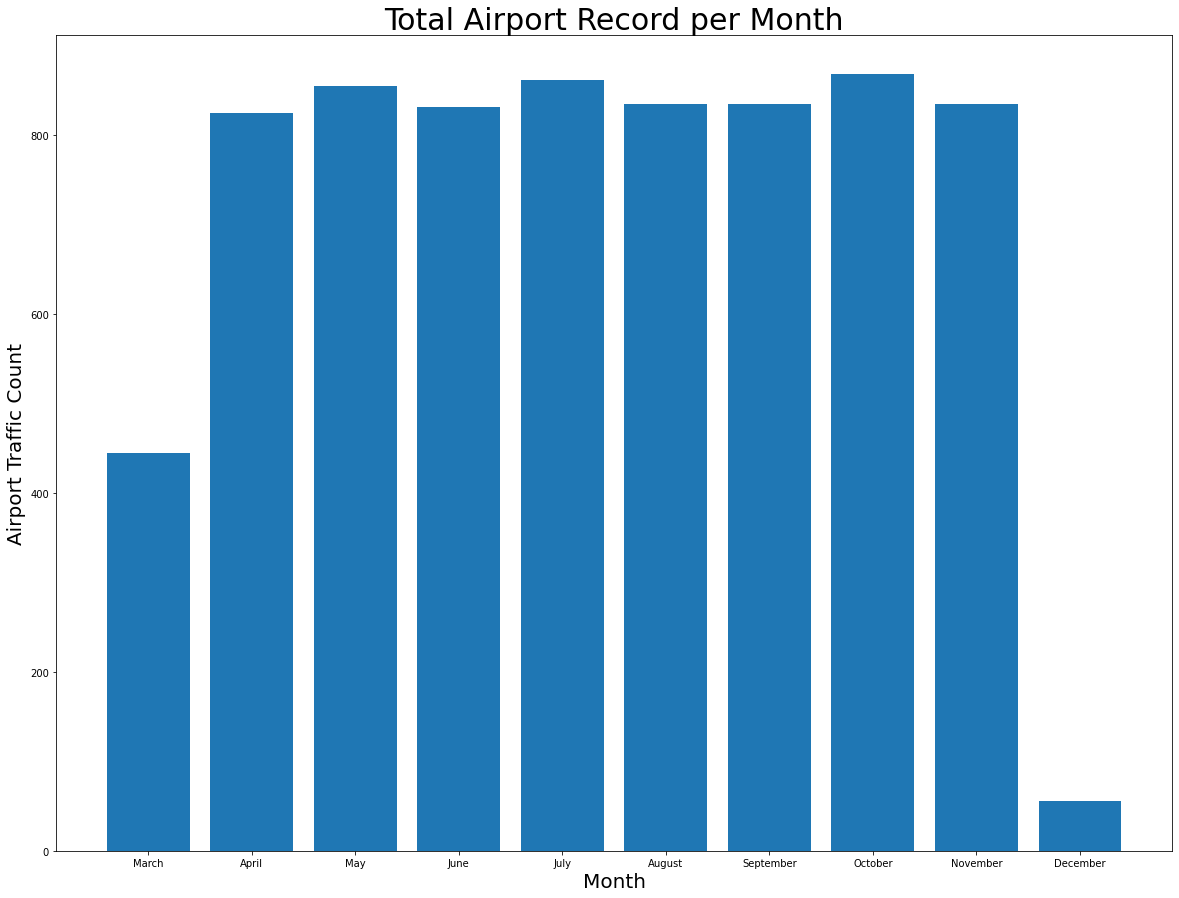

In [24]:
fig = plt.figure(figsize = (20, 15))

plt.bar(
    df_month_counts.Month,
    df_month_counts.Count
)
plt.xlabel('Month', size = 20)
plt.ylabel('Airport Traffic Count', size = 20)
plt.title('Total Airport Record per Month', size = 30)
plt.show()

### Summary of above plot
 - in response to the spread of COVID-19 it makes sense that in March there is drastic decrease in airport traffic since that is also when the United States implemented a country-wide lockdown
 - since the dataset is also mostly of US airports, it also shows how the March closures in the US affected the total airport traffic count for march
 - an interesting point to notice is that in December there is quite a low report in airport traffic

### Airport Records Per Month Per Country

In [25]:
df_month_counts_per_country = df.groupby('Country')['Month'] \
.value_counts() \
.to_frame(name = 'Count') \
.reset_index()

In [26]:
df_month_counts_per_country = sort_by_month(df_month_counts_per_country)

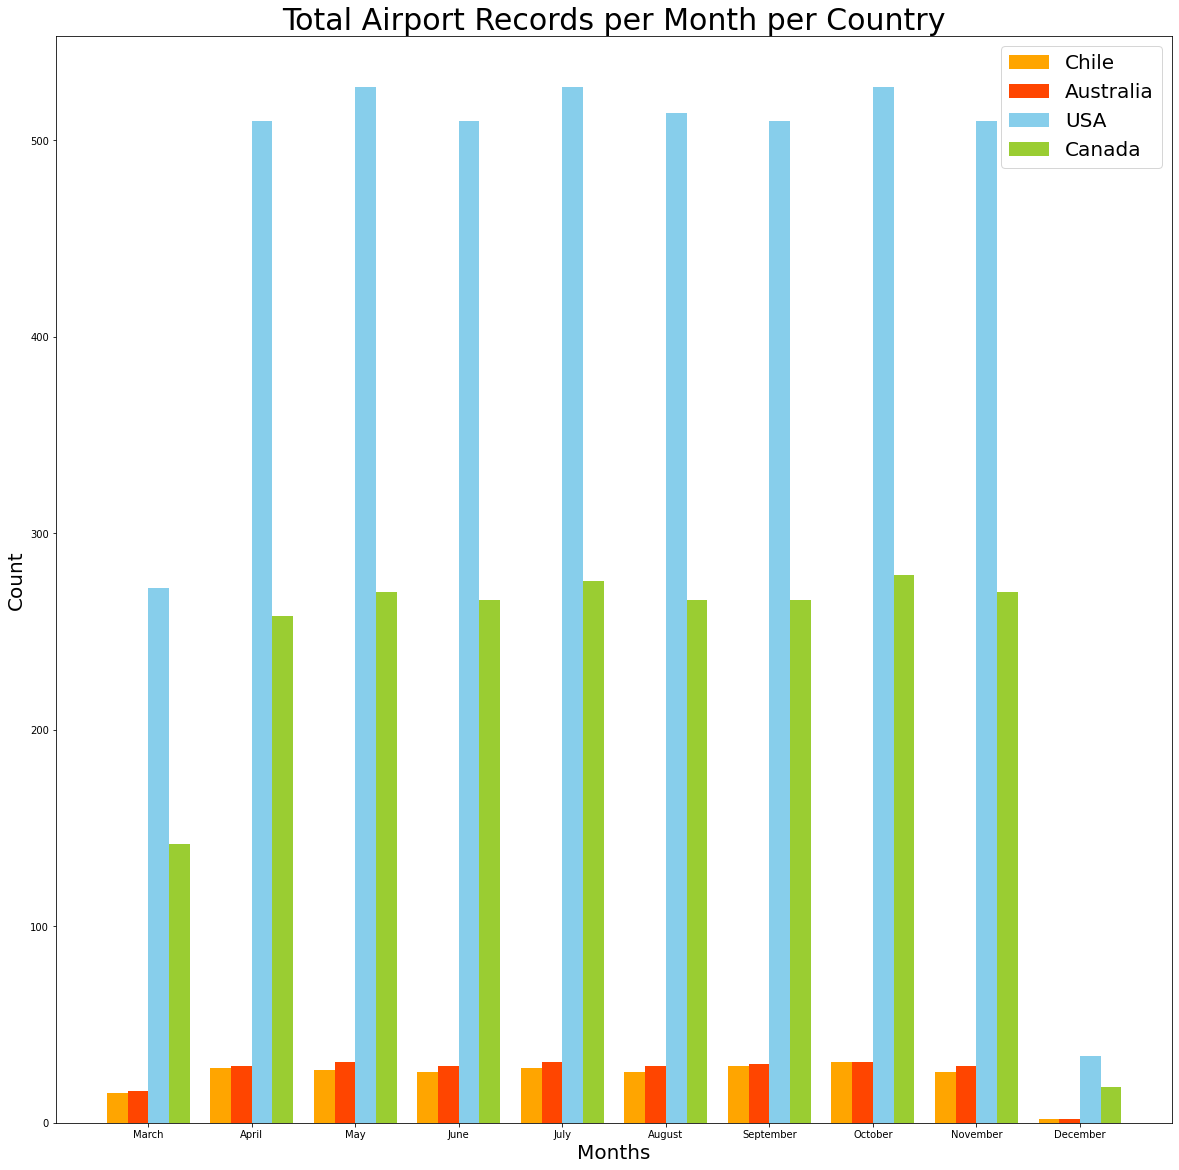

In [27]:
fig, ax = plt.subplots(1, figsize = (20, 20))

months = df_month_counts_per_country['Month']
country_list = df_month_counts_per_country['Country']
spacing = [-0.3, -0.1, 0.1, 0.3]
color_list = ['Orange', 'orangered', 'skyblue', 'yellowgreen']

bar_width = 0.2

x = np.arange(0, months.nunique())

# plotter of airport traffic counts for each country
for i in range(country_list.nunique()):
    plt.bar(
        x + spacing[i],
        df_month_counts_per_country.loc[
            country_list == country_list[i]
        ]['Count'],
        width = bar_width,
        color = color_list[i]
    )
    
plt.legend(country_list, loc = 'best', fontsize = 20)
plt.xticks(x, months.unique())   # sets categorical x-values labels
plt.title('Total Airport Records per Month per Country', size = 30)
plt.xlabel('Months', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

## Location of Airports 

### Using Folium
 - need to simplify df to not map duplicate airport locations (causes map loading problems)

In [28]:
df_airport_location = df[[
    'AirportName', 
    'State', 
    'latitude', 
    'longitude'
]] \
.drop_duplicates() \
.reset_index(drop = 'index')

df_airport_location.head()

,AirportName,State,latitude,longitude
0,Kingsford Smith,New South Wales,-33.9459774986125,151.180087713813
1,Santiago International Airport,Santiago Province,-33.3907265266744,-70.7942372739446
2,Calgary International,Alberta,51.1184753727795,-114.013122872131
3,Edmonton International,Alberta,53.308783097969,-113.576260685047
4,Vancouver International,British Columbia,49.1935788600694,-123.17754124324


In [29]:
world_map = folium.Map(titles = 'cartodbpositron')    # create base map
marker_cluster = MarkerCluster().add_to(world_map)

In [30]:
def airport_map(df):
    
    # initial conditions of plot
    map_latitude = 0
    map_longitutde = 160
    zoom = 1

    figure = folium.Figure(width=1000, height=500)
    
    Map = folium.Map(
        [map_latitude, map_longitutde], 
        zoom_start = zoom
    ).add_to(figure)

    for i in range(0,len(df)):
        folium.Marker(
            location = [
                df_airport_location['latitude'][i], 
                df_airport_location['longitude'][i]
            ],
            
            icon = folium.Icon(
                icon_color = 'white',
                icon = 'plane',
                prefix = 'fa')
        ).add_to(Map)

    return Map

In [31]:
airport_map(df_airport_location)

## Using Geopandas

#### Create a dataframe containing the avg PercentOFBaseline for each airport
 1. Sort the dataframe accordingly such that the summary stats and (Latitude, Longitude) values match with its corresponding airport

#### For Daily Baseline

In [32]:
df_daily_baseline_stats = pd.merge(
    df_daily_baseline_stats, 
    df_airport_location, 
    on = 'AirportName'
)

df_daily_baseline_stats.head(2)

,AirportName,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max,State,latitude,longitude
0,Boston Logan International,261.0,64.704981,8.730645,32.0,60.0,64.0,68.0,97.0,Massachusetts,42.3636330376787,-71.0102909977065
1,Calgary International,261.0,89.513410,14.520172,19.0,87.0,93.0,100.0,100.0,Alberta,51.1184753727795,-114.013122872131


#### For Monthly Baseline

In [33]:
df_monthly_baseline_stats = pd.merge(
    df_monthly_baseline_stats,
    df_airport_location, 
    on = 'AirportName'
)

df_monthly_baseline_stats.head(2)

,AirportName,Month,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max,State,latitude,longitude
0,Boston Logan International,April,30.0,59.900000,4.412756,48.0,56.25,60.0,63.0,66.0,Massachusetts,42.3636330376787,-71.0102909977065
1,Boston Logan International,August,30.0,65.933333,4.961461,57.0,62.00,65.5,68.0,76.0,Massachusetts,42.3636330376787,-71.0102909977065


#### For Weekday Baseline

In [34]:
df_weekday_baseline_stats = pd.merge(
    df_weekday_baseline_stats,
    df_airport_location, 
    on = 'AirportName'
)

df_weekday_baseline_stats.head(2)

,AirportName,Weekday,count,Avg PercentOfBaseline,std,min,25%,50%,75%,max,State,latitude,longitude
0,Boston Logan International,Friday,37.0,63.567568,7.672246,46.0,59.0,63.0,68.0,89.0,Massachusetts,42.3636330376787,-71.0102909977065
1,Boston Logan International,Monday,37.0,64.162162,10.510612,32.0,60.0,65.0,69.0,97.0,Massachusetts,42.3636330376787,-71.0102909977065


In [35]:
# create a dictionary of gdfs 
# where values are the geodataframes
# and keys are the gdf names

# a list of gdf names (keys for dictionary)
gdf_names = [
    'gdf_daily_baseline',
    'gdf_monthly_baseline',
    'gdf_weekday_baseline'
]

# a list of dataframes that are to be converted into gdfs
dfs_to_transform = [
    df_daily_baseline_stats,
    df_monthly_baseline_stats,
    df_weekday_baseline_stats
]

gdfs = {}    # create empty dictionary

for k, v in zip(gdf_names, dfs_to_transform):
    gdfs[k] = gpd.GeoDataFrame(
        v,                              # the dataframe
        geometry = gpd.points_from_xy(
            v['longitude'],             # df columns
            v['latitude']
        )
    )

gdfs.keys()

dict_keys(['gdf_daily_baseline', 'gdf_monthly_baseline', 'gdf_weekday_baseline'])

In [36]:
# get world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


Text(0.5, 1.0, 'example world map')

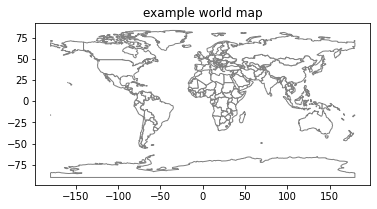

In [37]:
# plot map
g = world.plot(color='white', edgecolor='gray')

g.set_title("example world map")

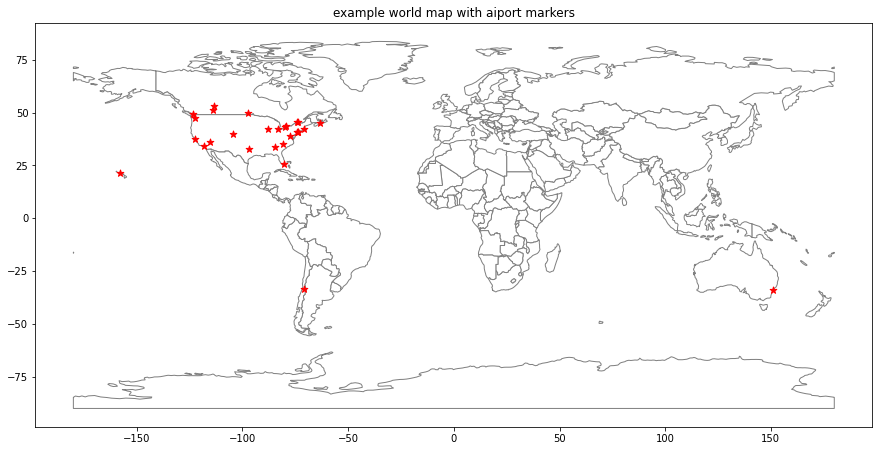

In [38]:
# overwrite world map with airport locations
ax = world.plot(color='white', edgecolor='gray', figsize=(15, 10))

# can use any gdf since all airports have the same locations 
g = gdfs['gdf_daily_baseline'].plot(
    ax = ax, 
    marker = '*', 
    color = 'red', 
    markersize = 50
)

g.set_title("example world map with aiport markers")
plt.show()

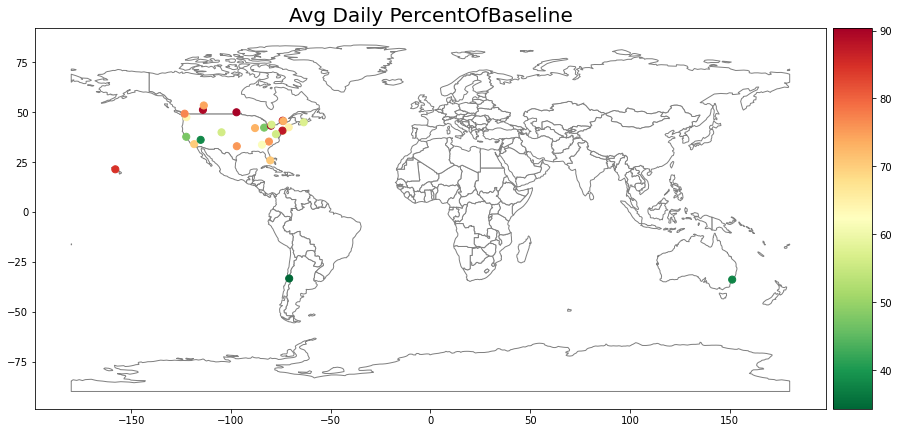

In [39]:
# Chloropleth Map
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(
    ax = ax, 
    color = 'white', 
    edgecolor = 'gray'
)

g = gdfs['gdf_daily_baseline'].plot(
    column = 'Avg PercentOfBaseline', 
    ax = ax, 
    markersize = 50, 
    legend = True, 
    cax = cax,
    cmap = 'RdYlGn_r'
)

g.set_title('Avg Daily PercentOfBaseline', size = 20)
plt.show()

### Further Analysis:
Further analysis can be done for average monthly PercentOfBaseline to see which months had a change in important traffic in response to COVID-19. Another analysis can be done to see which weekday was the most effected by the pandemic.

# Key Noticeable Traits from Above Plots
 - PercentOfBaseline is a bimodal distribution
 - Dataset is skewed towards North American Countries specifically USA (since dataset containied mostly USA airports)
 - In the Since in March the United States implemented lockdown procedures, it

# Correlation Matrix of dataset variables

To understand the relationships between the variables via a correlation matrix heatmap

Will be using:
 1. pandas.factorize()
 2. pandas.get_dummies()
 3. Label

## Encoding categorical variables - pandas.factorize()

In [40]:
def en_factor (df):
    
    # select the categorical columns
    for column in df.columns[~df.columns.isin(['PercentOfBaseline', 'Date'])]:
        df[column] = df[column].factorize()[0]    # save the factorized numbers [0] into its respective column
    
    return df

In [41]:
def corr_map (df):
    fig = plt.figure(figsize = (20, 15))
    sns.set(font_scale = 1.8)  # sets font size for all text on plot
    sns.heatmap(
        df.corr(),
        annot = True,
        cmap = 'RdYlGn_r'    # reverse color
    )

In [42]:
df_factor = en_factor(df)
df_factor.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,Weekday,Month,longitude,latitude
0,2020-04-03,0,64,0,0,0,0,0,0,0,0,0
1,2020-04-13,0,29,0,0,0,0,0,1,0,0,0
2,2020-07-10,0,54,0,0,0,0,0,0,1,0,0
3,2020-09-02,0,18,0,0,0,0,0,2,2,0,0
4,2020-10-31,0,22,0,0,0,0,0,3,3,0,0


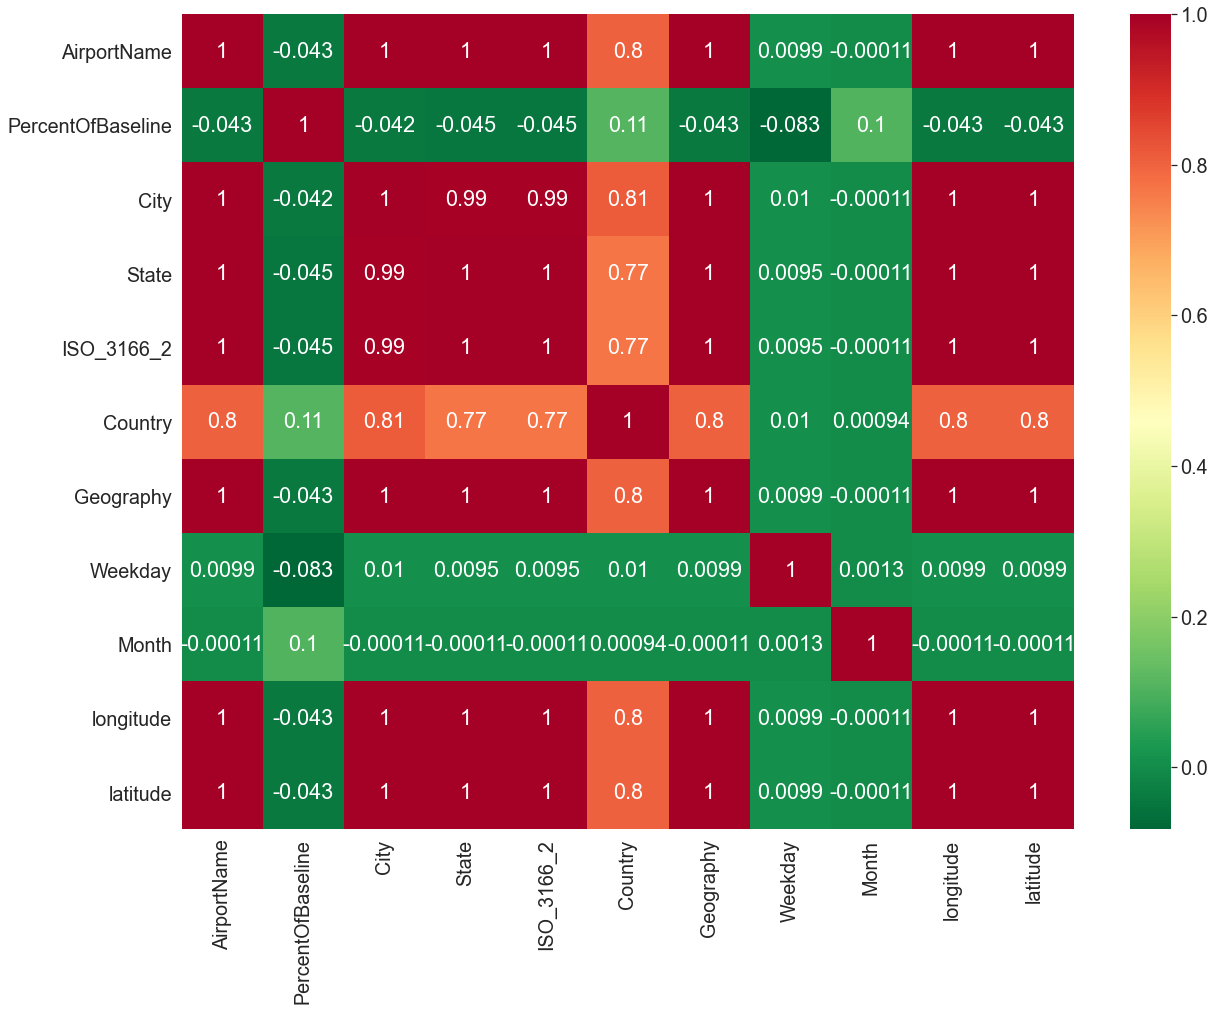

In [43]:
corr_map(df_factor)

## Encoding categorical variables One Hot Encoding
 - using pandas.get_dummies()
 - works for all other types of variables not exclusive to categorical

In [44]:
df1 = df.copy()

In [45]:
df1 = pd.get_dummies(df1)
df1.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,Weekday,Month,longitude,latitude
0,2020-04-03,0,64,0,0,0,0,0,0,0,0,0
1,2020-04-13,0,29,0,0,0,0,0,1,0,0,0
2,2020-07-10,0,54,0,0,0,0,0,0,1,0,0
3,2020-09-02,0,18,0,0,0,0,0,2,2,0,0
4,2020-10-31,0,22,0,0,0,0,0,3,3,0,0


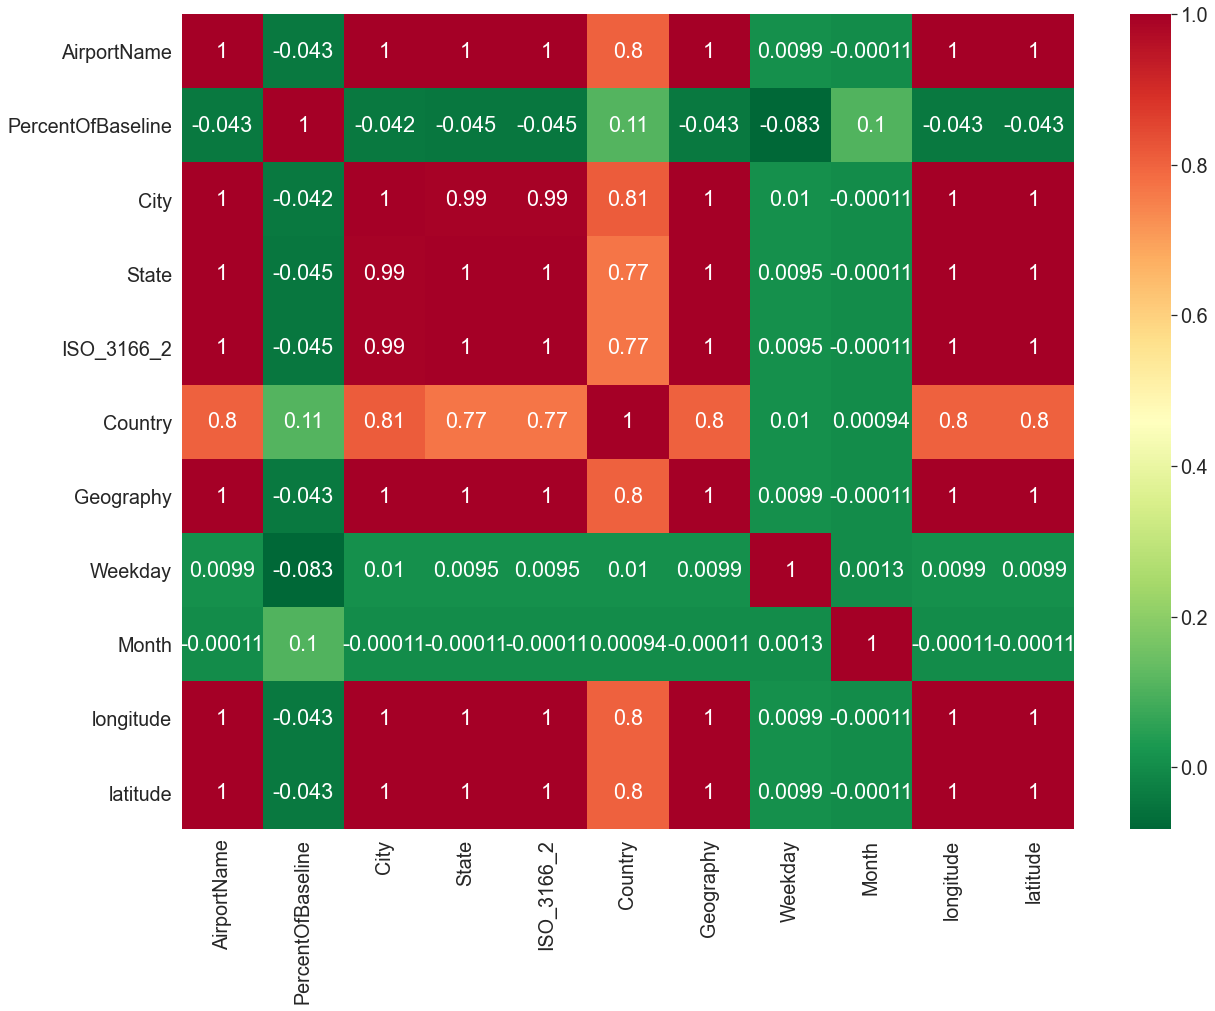

In [46]:
corr_map(df1)

## Encoding categorical variables - LabelEncoder()
 - label encoding not suitable for linear models

In [47]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df2 = df.copy()     # for label encoder

In [48]:
le = LabelEncoder()

# passes indices of categorical columns into the transform function
for column in df2.columns[~df2.columns.isin(['PercentOfBaseline', 'Date'])]:
    
    # fit and transform each of the dfs categorical columns using Label Encoder
    df2[column] = le.fit_transform(df2[f'{column}'])

In [52]:
df2.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,Weekday,Month,longitude,latitude
0,2020-04-03,0,64,0,0,0,0,0,0,0,0,0
1,2020-04-13,0,29,0,0,0,0,0,1,0,0,0
2,2020-07-10,0,54,0,0,0,0,0,0,1,0,0
3,2020-09-02,0,18,0,0,0,0,0,2,2,0,0
4,2020-10-31,0,22,0,0,0,0,0,3,3,0,0


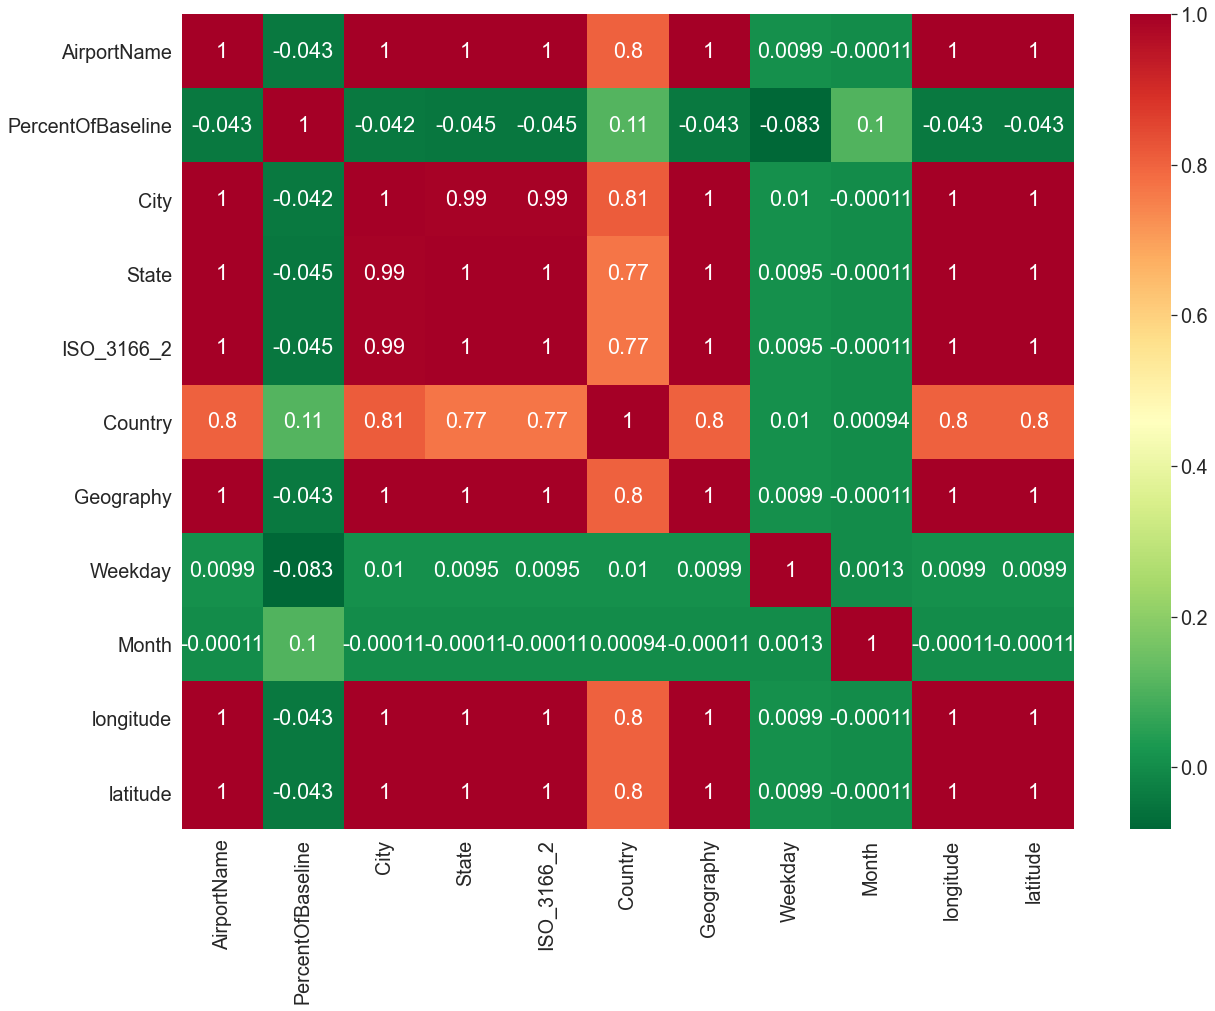

In [49]:
corr_map(df2)

## Encoding categorical variables - OneHotEncoder()

In [50]:
df3 = df.copy()

enc = OneHotEncoder()
onehot_labels = enc.fit_transform(df3).toarray()

In [51]:
onehot_labels.shape

(7247, 567)

corr_map(pd.DataFrame(onehot_labels))